In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("Mall_Customers.csv")

In [15]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [23]:
x = df.iloc[:,3:]

In [25]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


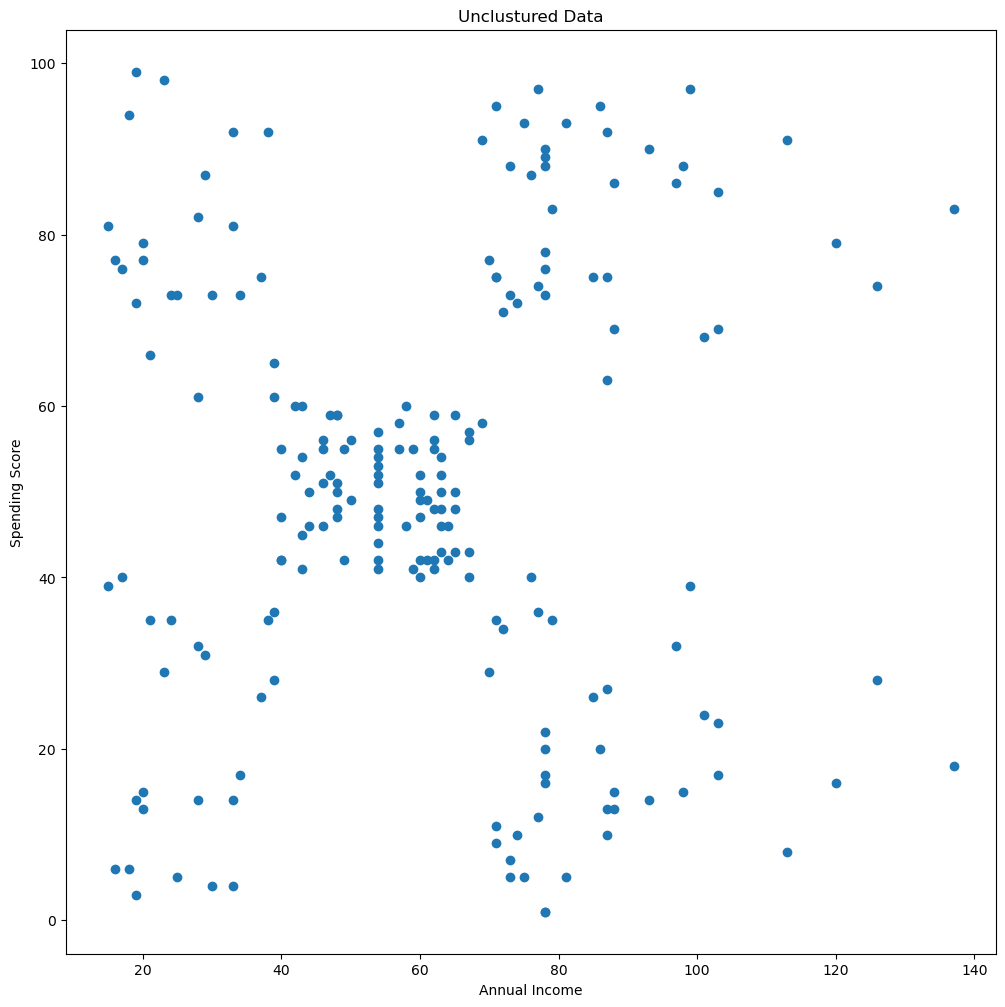

In [39]:
plt.figure(figsize = (12,12))
plt.title('Unclustured Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"]);

In [41]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [55]:
km = KMeans(n_clusters = 3)

In [53]:
!python -m pip install --upgrade pip



  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [59]:
km.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [61]:
km.inertia_

106348.37306211118

In [63]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters = k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [65]:
sse

[269981.28,
 186234.16783216782,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 37220.64540731008,
 28382.177654552743,
 21916.794789843727,
 19787.67055496685,
 19011.6898000607,
 16601.80834165834,
 17033.09001425871,
 13878.757585991385,
 13250.239892770067]

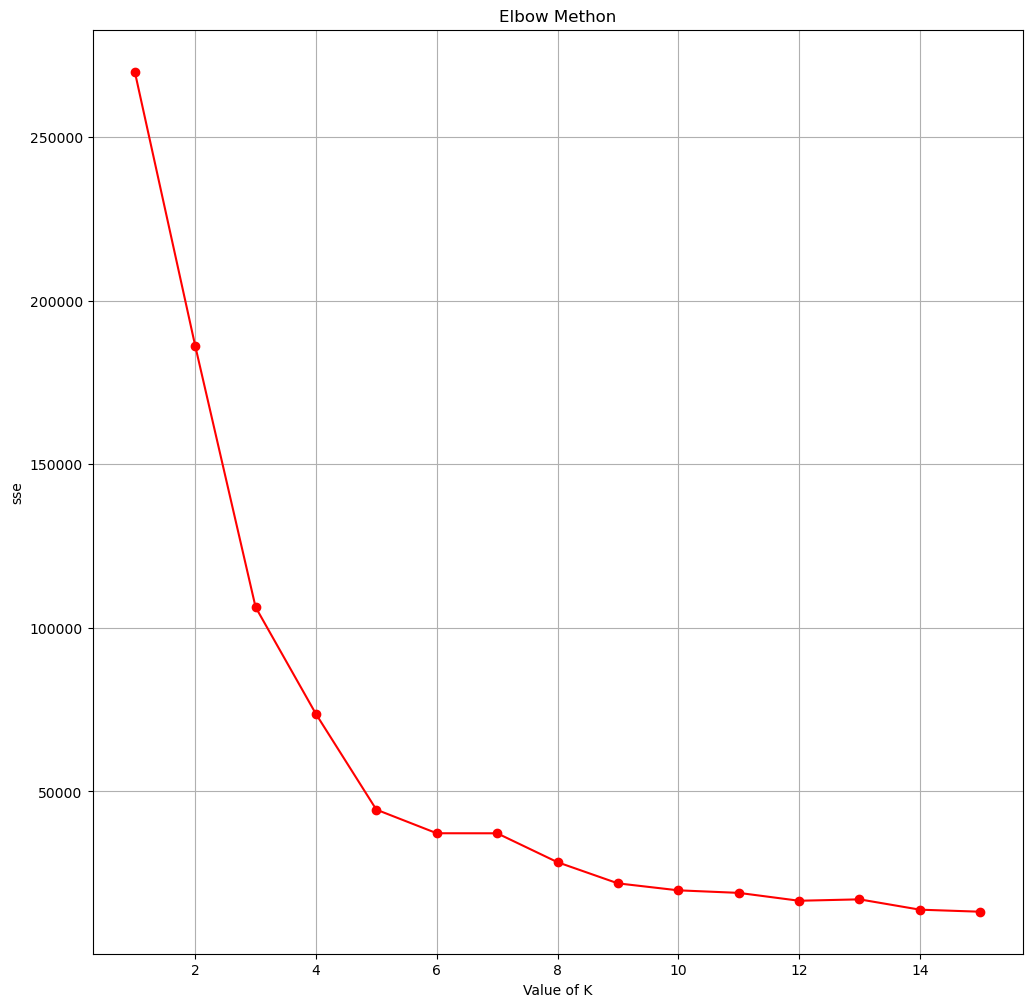

In [75]:
plt.figure(figsize= (12,12))
plt.title("Elbow Methon")
plt.xlabel("Value of K")
plt.ylabel("sse")
plt.plot(range(1,16),sse,color = 'red',marker = 'o')
plt.grid();

In [79]:
from sklearn.metrics import silhouette_score

In [87]:
sil = []
for k in range(2,16):
    km = KMeans(n_clusters = k)
    label = km.fit_predict(x)
    score = silhouette_score(x,label)
    sil.append(score)

In [89]:
sil


[0.39564531743995546,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.45705720010448403,
 0.5270287298101395,
 0.4524920580538445,
 0.450058412834313,
 0.42897372645018067,
 0.4209105000344341,
 0.42457710599889764,
 0.4329605160177729,
 0.41042505252558553,
 0.416325447433192]

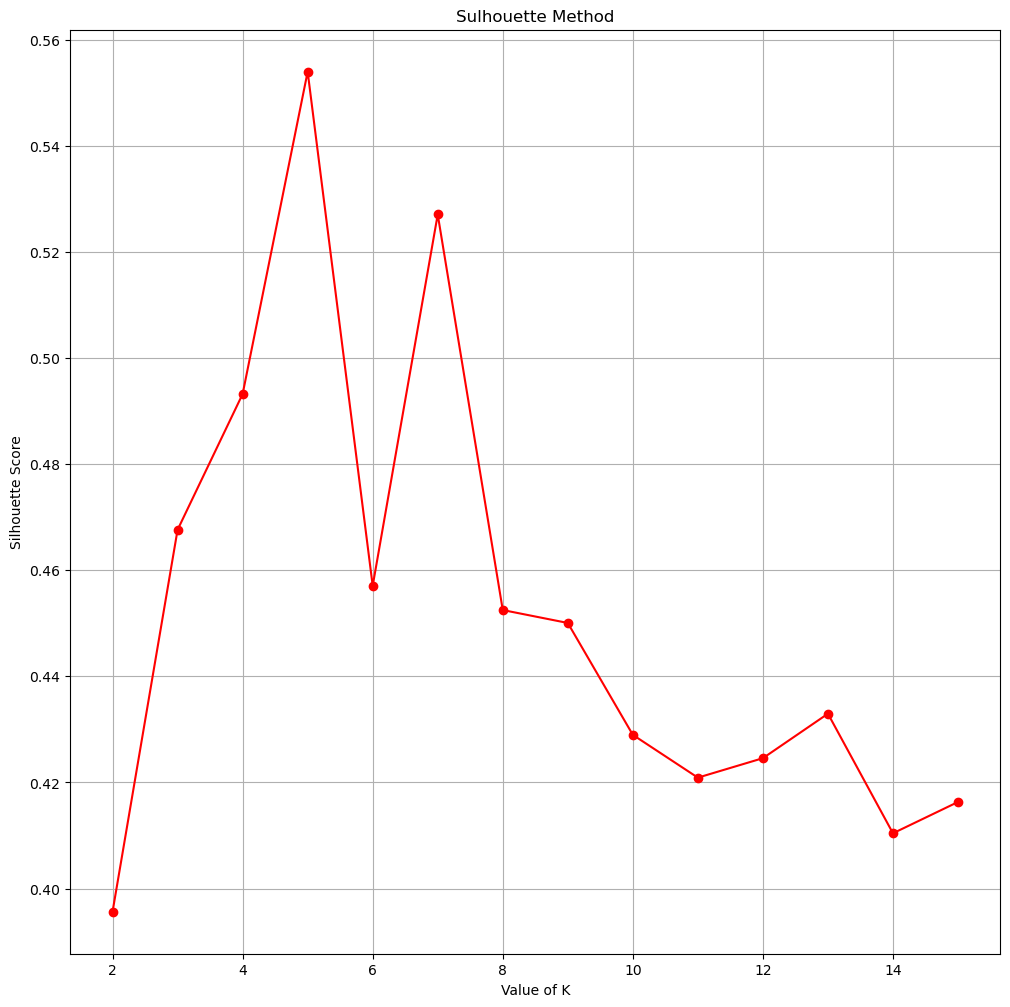

In [91]:
plt.figure(figsize= (12,12))
plt.title("Sulhouette Method")
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.plot(range(2,16),sil,color = 'red',marker = 'o')
plt.grid();

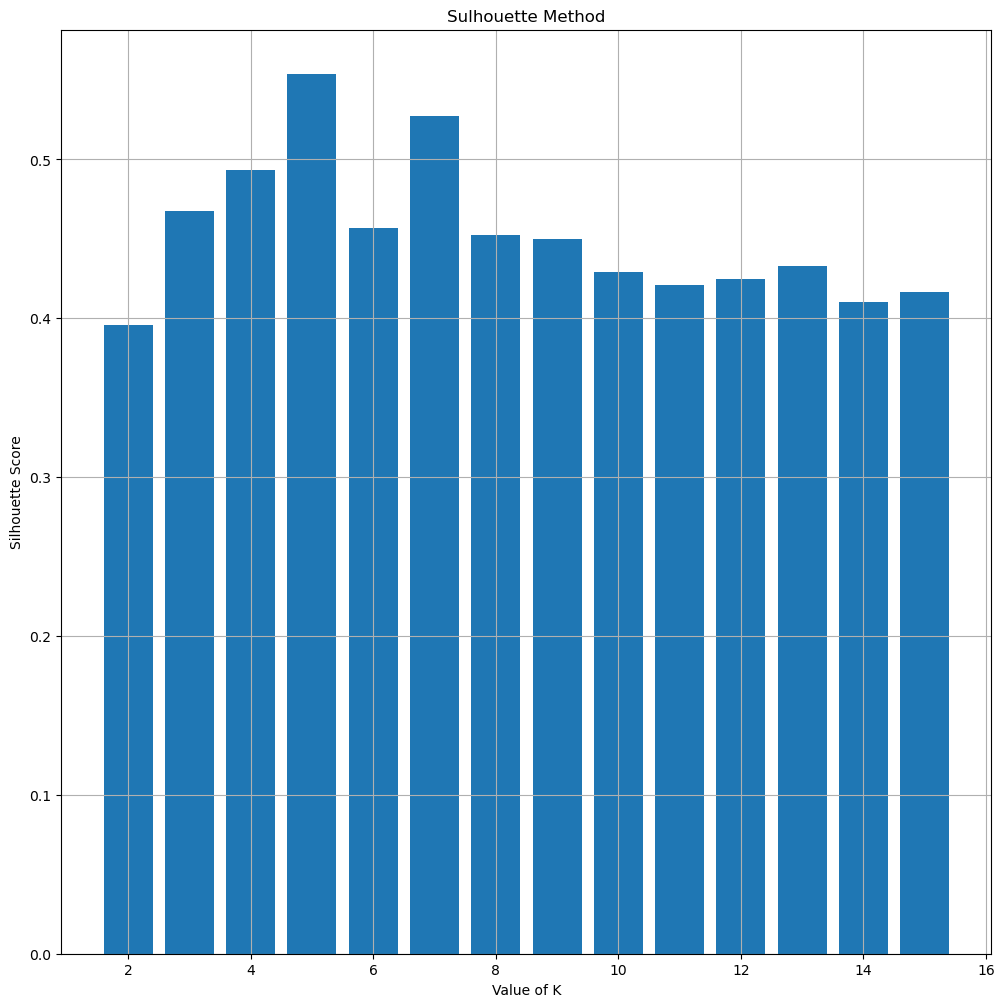

In [95]:
plt.figure(figsize= (12,12))
plt.title("Sulhouette Method")
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.bar(range(2,16),sil)
plt.grid();

In [99]:
km = KMeans(n_clusters = 5,random_state = 0)
labels = km.fit_predict(x)

In [101]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

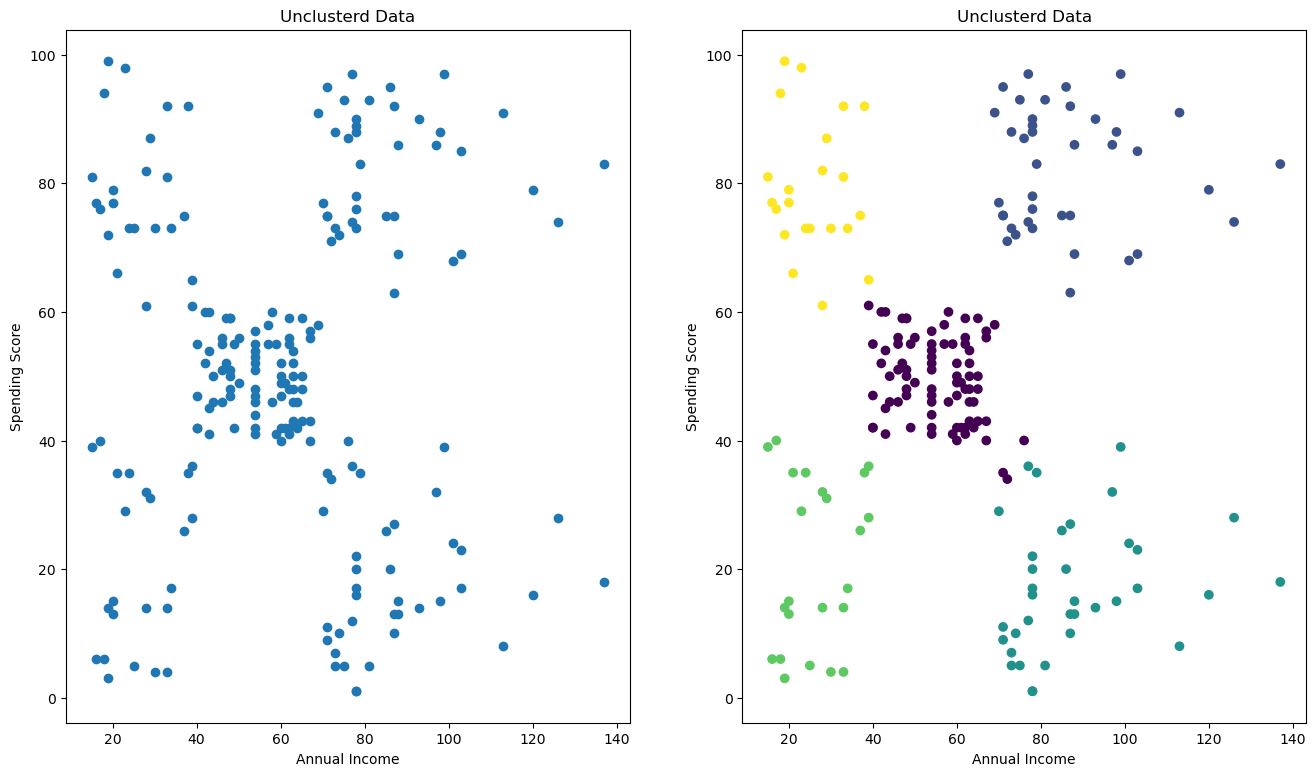

In [105]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.title("Unclusterd Data")
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)']);

plt.subplot(1,2,2)
plt.title("Unclusterd Data")
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c = labels);

In [107]:
km.inertia_

44448.45544793371

In [109]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [111]:
four = df[labels==4]

In [113]:
km.predict([[26,78]])

array([4])

In [117]:
agl = AgglomerativeClustering(n_clusters = 5)

In [119]:
alabels = agl.fit_predict(x)

In [121]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [125]:
cent = km.cluster_centers_

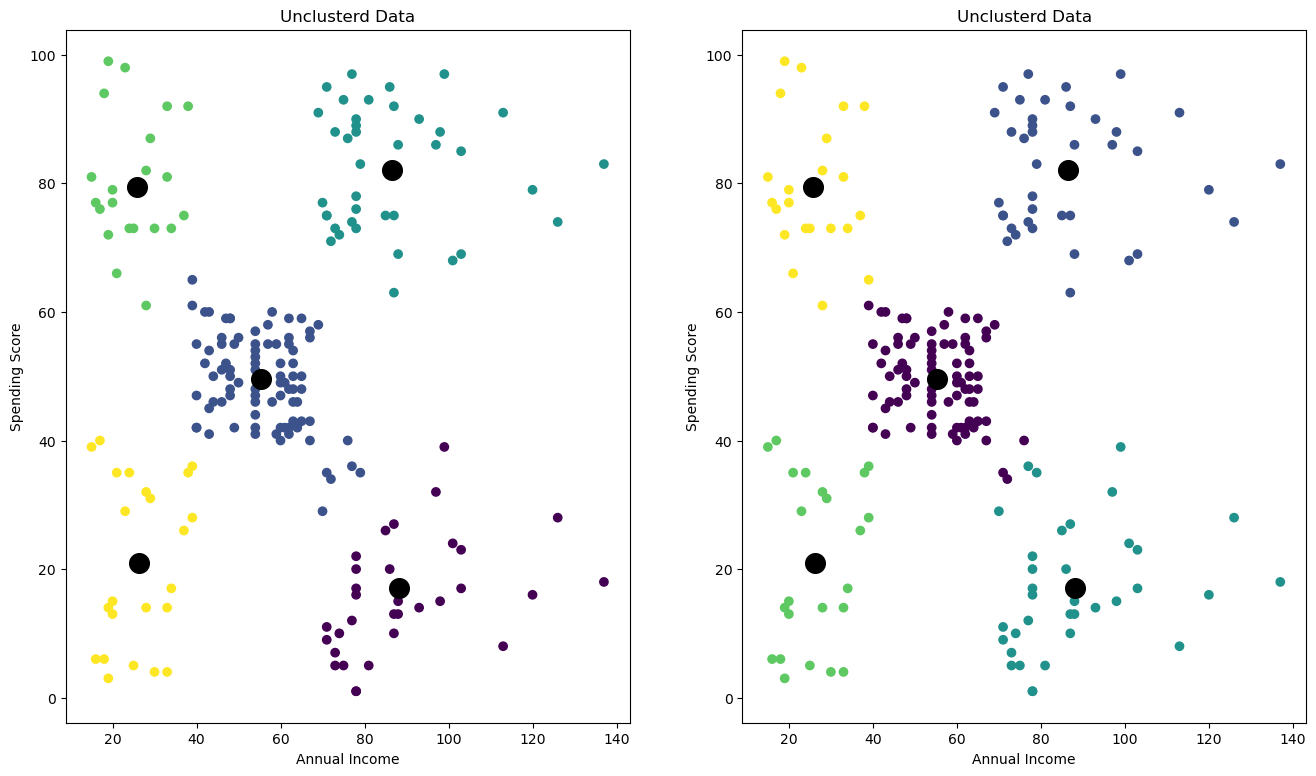

In [135]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.title("Unclusterd Data")
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c = alabels);
plt.scatter(cent[:,0],cent[:,1],s = 200,color = "k")

plt.subplot(1,2,2)
plt.title("Unclusterd Data")
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c = labels);
plt.scatter(cent[:,0],cent[:,1],s = 200,color = "k");